# Biodiversity of National Parks Notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import squarify

# Load the datasets
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

# Display the first few rows of both datasets
observations.head(), species_info.head()


(            scientific_name                            park_name  observations
 0        Vicia benghalensis  Great Smoky Mountains National Park            68
 1            Neovison vison  Great Smoky Mountains National Park            77
 2         Prunus subcordata               Yosemite National Park           138
 3      Abutilon theophrasti                  Bryce National Park            84
 4  Githopsis specularioides  Great Smoky Mountains National Park            85,
   category                scientific_name  \
 0   Mammal  Clethrionomys gapperi gapperi   
 1   Mammal                      Bos bison   
 2   Mammal                     Bos taurus   
 3   Mammal                     Ovis aries   
 4   Mammal                 Cervus elaphus   
 
                                         common_names conservation_status  
 0                           Gapper's Red-Backed Vole                 NaN  
 1                              American Bison, Bison                 NaN  
 2  Aurochs, 

In [3]:
# Merging the datasets on 'scientific_name'
merged_data = pd.merge(observations, species_info, on='scientific_name')

# Display the merged dataset
merged_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [4]:
from folium.plugins import HeatMap

# Create a base map of the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Static locations for the parks (replace these with accurate park locations)
park_locations = {
    'Great Smoky Mountains National Park': [35.6532, -83.5070],
    'Yosemite National Park': [37.8651, -119.5383],
    'Bryce National Park': [37.5930, -112.1871]
}

# Filter the data to exclude rows with "No Status" or missing conservation status
filtered_data = merged_data[~merged_data['conservation_status'].isna() & (merged_data['conservation_status'] != 'No Status')]

# Prepare data for the heatmap (latitude, longitude, and intensity based on observations)
heat_data = []
for index, row in filtered_data.iterrows():
    park_name = row['park_name']
    if park_name in park_locations:
        # Append the location (lat, lon) and the observation count for weighting
        heat_data.append([park_locations[park_name][0], park_locations[park_name][1], row['observations']])

# Add the HeatMap layer to the map
HeatMap(heat_data).add_to(us_map)

# Display the map
us_map


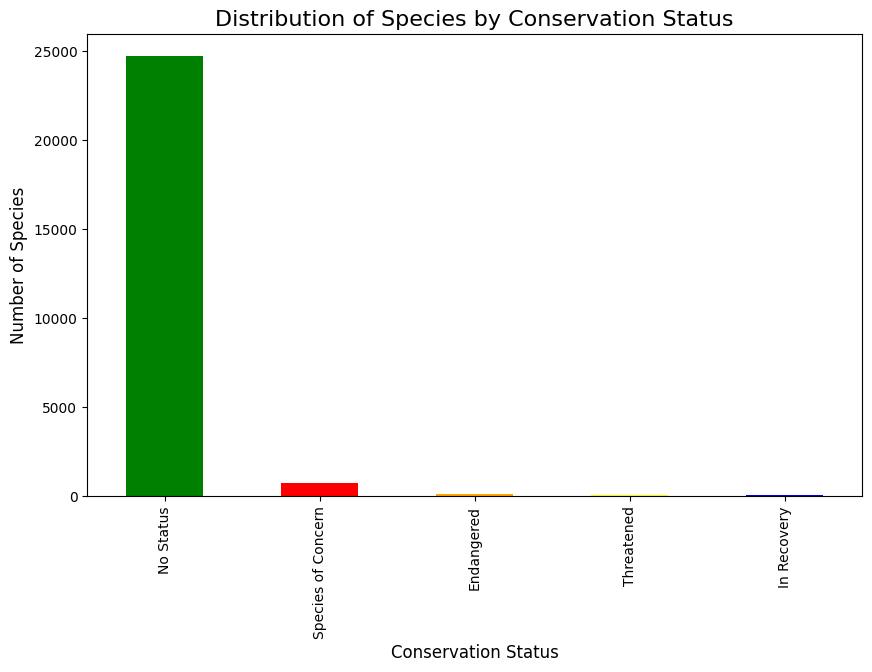

In [5]:

# Replace missing values in 'conservation_status' with 'No Status'
merged_data['conservation_status'].fillna('No Status', inplace=True)

# Count the number of species for each conservation status
status_counts = merged_data['conservation_status'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=['green', 'red', 'orange', 'yellow', 'blue'])

# Adding titles and labels
plt.title('Distribution of Species by Conservation Status', fontsize=16)
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)

# Show the plot
plt.show()


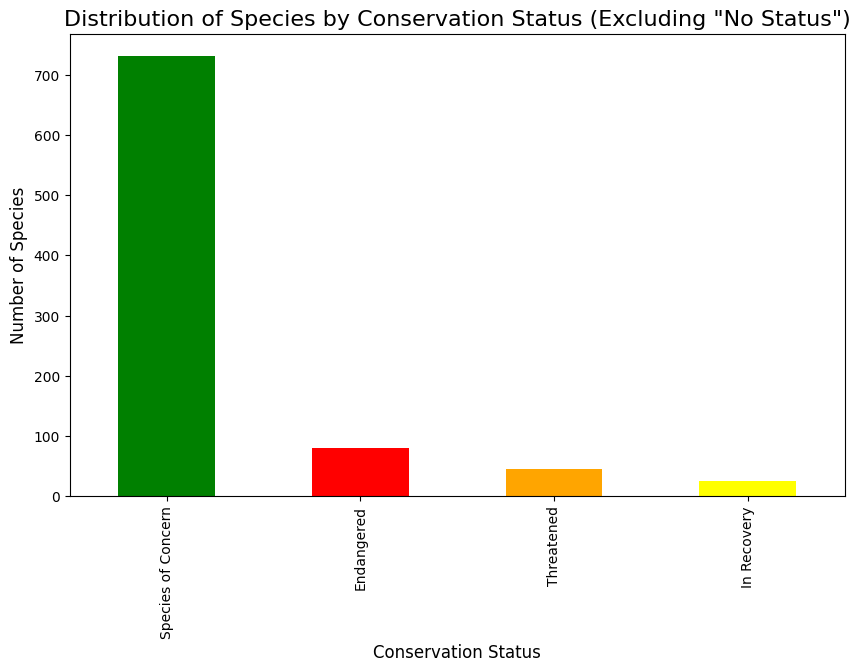

In [6]:
# Step 3: Visualize the Data with a Histogram (Excluding 'No Status')



# Replace missing values in 'conservation_status' with 'No Status'
merged_data['conservation_status'].fillna('No Status', inplace=True)

# Filter out 'No Status'
filtered_data = merged_data[merged_data['conservation_status'] != 'No Status']

# Count the number of species for each conservation status
status_counts = filtered_data['conservation_status'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=['green', 'red', 'orange', 'yellow', 'blue'])

# Adding titles and labels
plt.title('Distribution of Species by Conservation Status (Excluding "No Status")', fontsize=16)
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)

# Show the plot
plt.show()


In [10]:
conservationCategory = merged_data[merged_data.conservation_status != 'No Status']\
.groupby(["conservation_status", "category"])["scientific_name"]\
.count()\
.unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,44.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,12.0,NaN,NaN,NaN
Species of Concern,16.0,320.0,16.0,168.0,20.0,20.0,172.0
Threatened,8.0,NaN,20.0,8.0,NaN,NaN,8.0


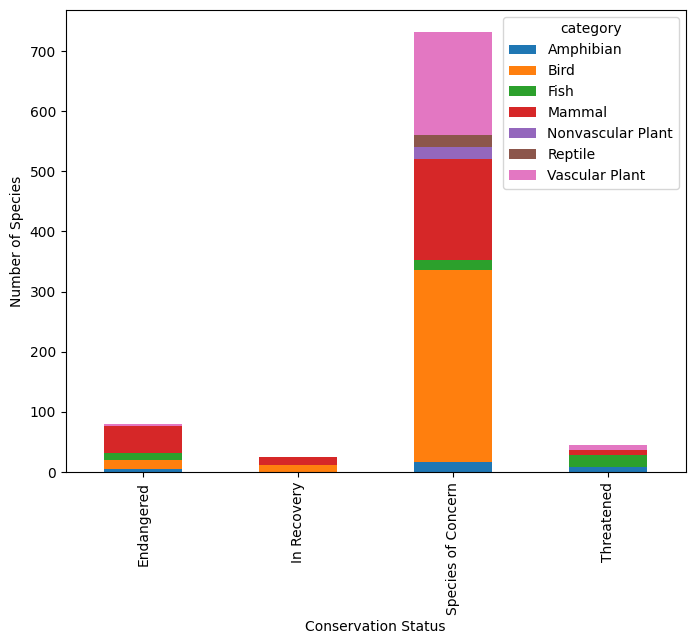

In [11]:
ax = conservationCategory.plot(kind="bar", figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");